# Exercises - Modeling

Do your work for this exercise in a jupyter notebook named modeling within the regression-exercises repo. Add, commit, and push your work.

## Select a dataset with a continuous target variable.


In [115]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, TweedieRegressor, LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE, f_regression, SelectKBest
from scipy import stats


import warnings
warnings.filterwarnings("ignore")

In [15]:
data().head()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students


In [12]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [13]:
df = data('mpg')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [16]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [21]:
df = df.rename(columns={'fl':'fuel'})``

In [44]:
df['mpg'] = (df.hwy + df.cty)/2

In [45]:
df.describe()

,displ,year,cyl,cty,hwy,mpg
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171,20.149573
std,1.291959,4.509646,1.611534,4.255946,5.954643,5.050290
min,1.600000,1999.000000,4.000000,9.000000,12.000000,10.500000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000,15.500000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000,20.500000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000,23.500000
max,7.000000,2008.000000,8.000000,35.000000,44.000000,39.500000


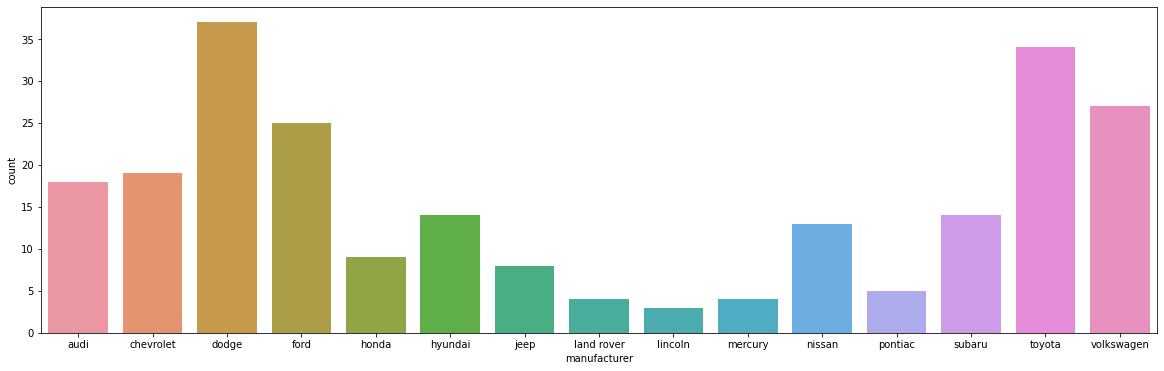

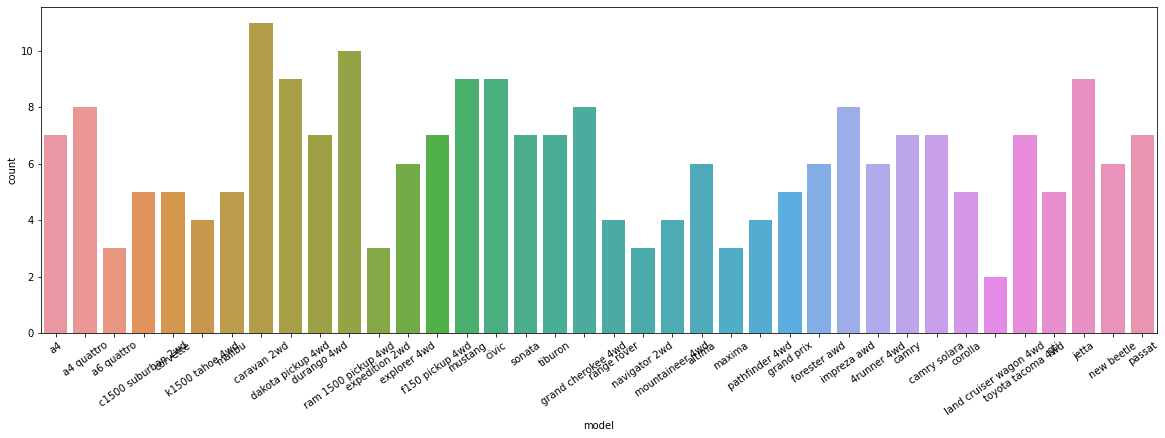

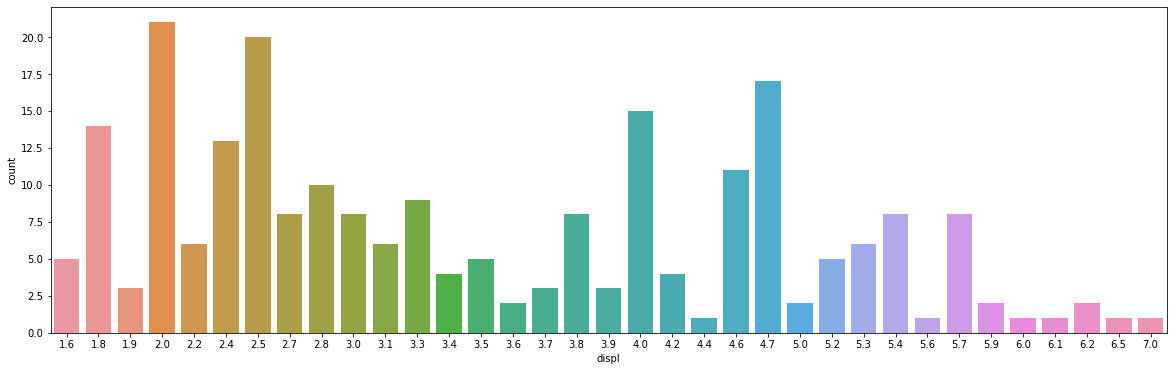

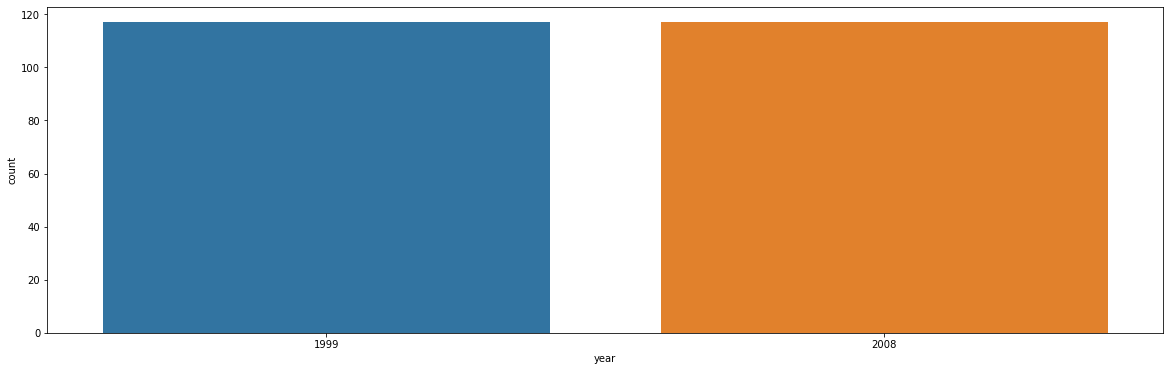

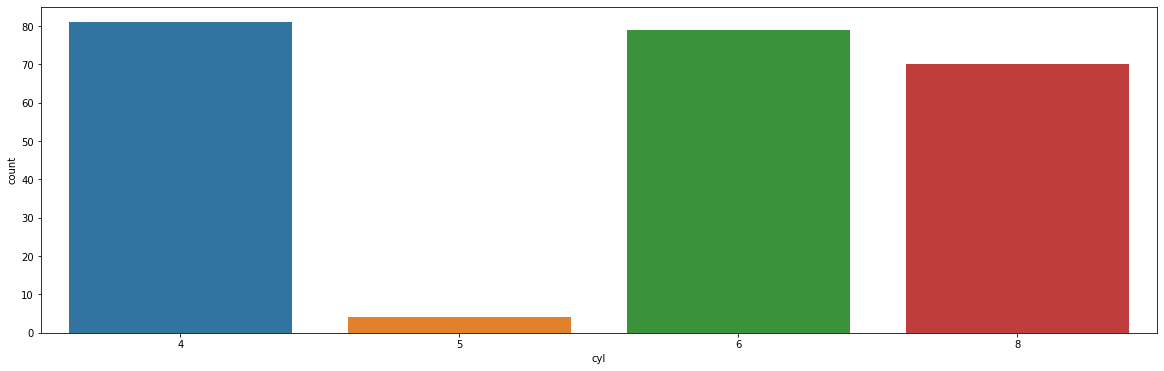

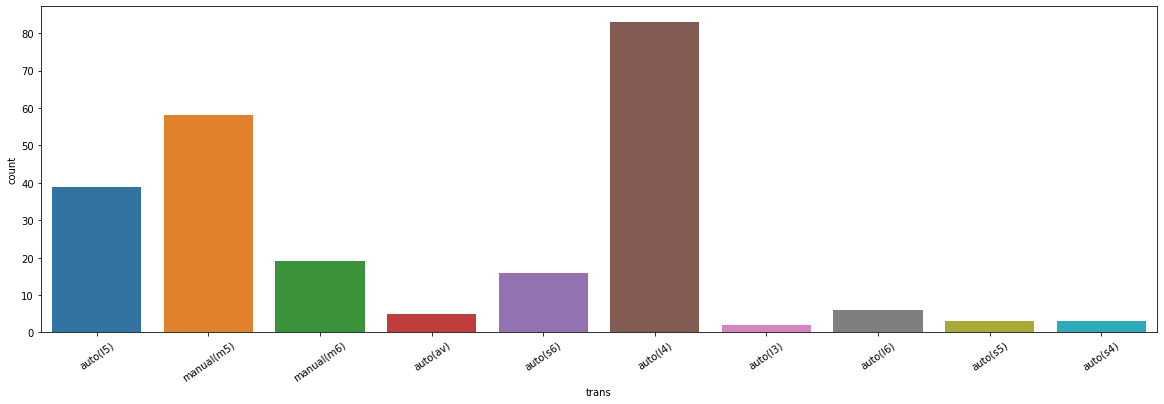

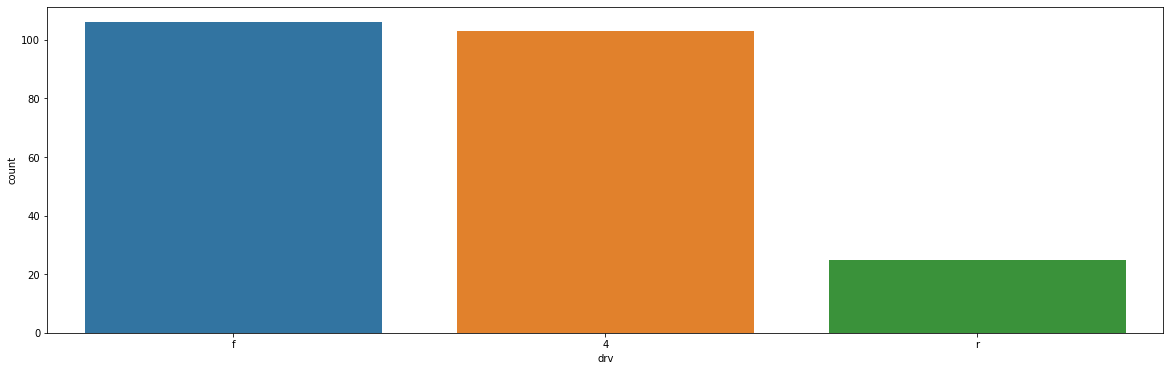

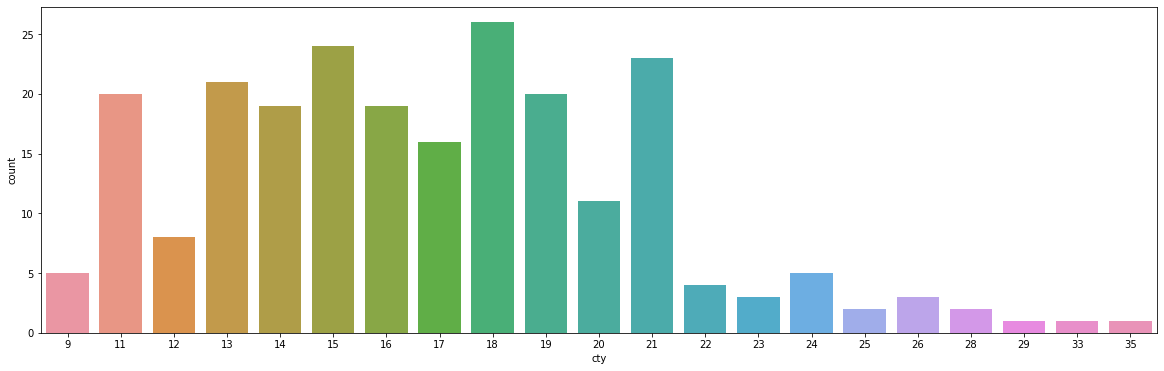

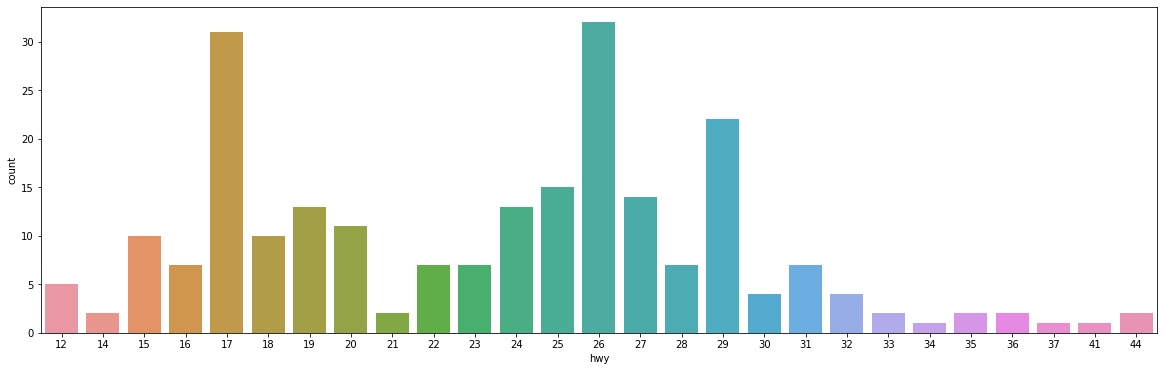

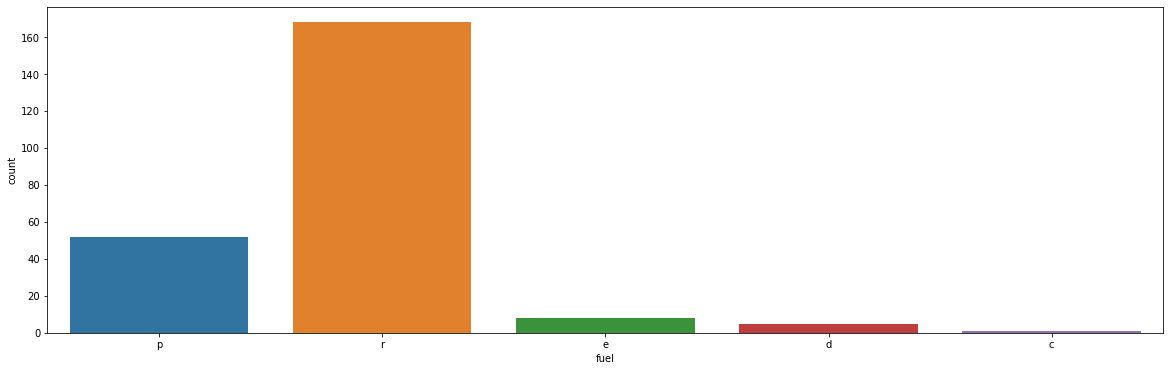

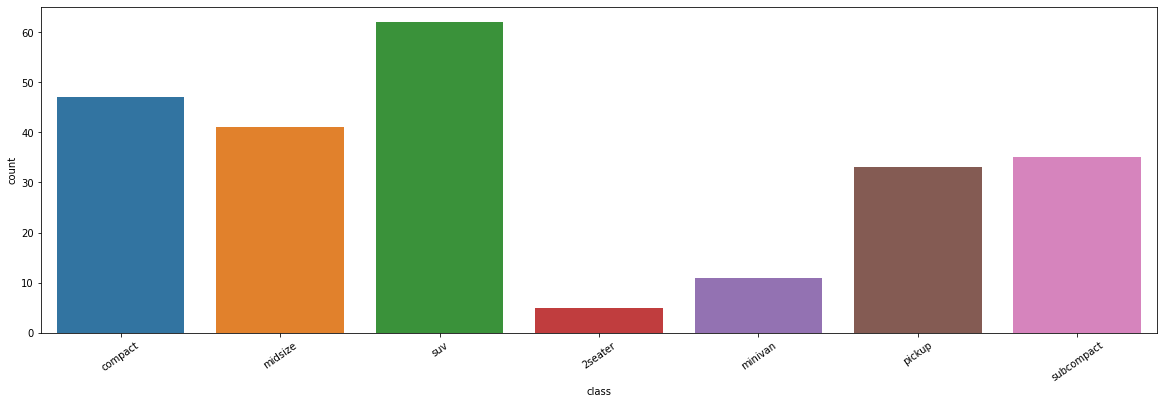

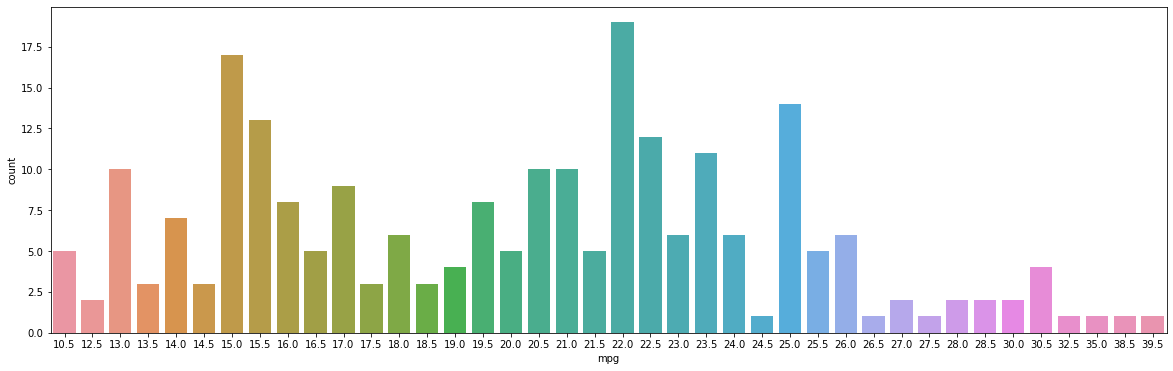

In [46]:
for col in df.columns:
    plt.figure(figsize=(20,6))
    sns.countplot(df[col], dodge=True)
    if col in ['model', 'trans', 'class']:
        plt.xticks(rotation=35)
    plt.show()

## Takeaways
* Drop model, 
* combine trans --> auto or manual
* create avg_mpg
* categorical (make objects) -- > year, cyl

In [49]:
df[['year', 'cyl']] = df[['year', 'cyl']].astype(object)

In [73]:
df.trans = np.where(df.trans.str.contains('auto'), 'auto', 'manual')

In [74]:
df.trans.head(5)

1      auto
2    manual
3    manual
4      auto
5      auto
Name: trans, dtype: object

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    object 
 4   cyl           234 non-null    object 
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fuel          234 non-null    object 
 10  class         234 non-null    object 
 11  mpg           234 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 31.9+ KB


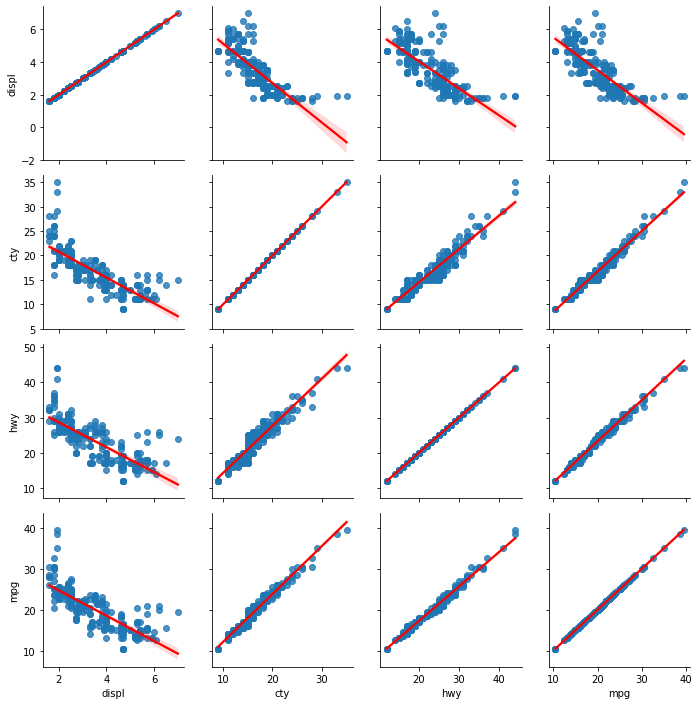

In [58]:
g = sns.PairGrid(df.select_dtypes(exclude='object'))
g.map(sns.regplot, line_kws={'color':'r'})

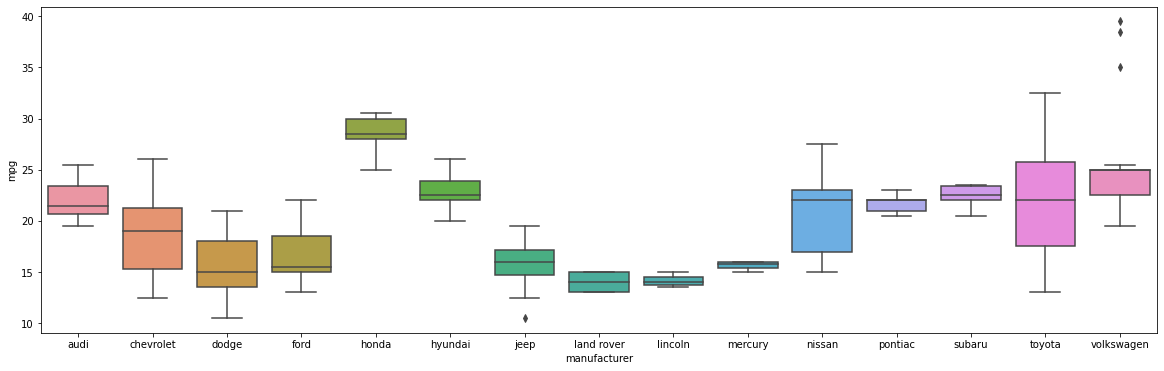

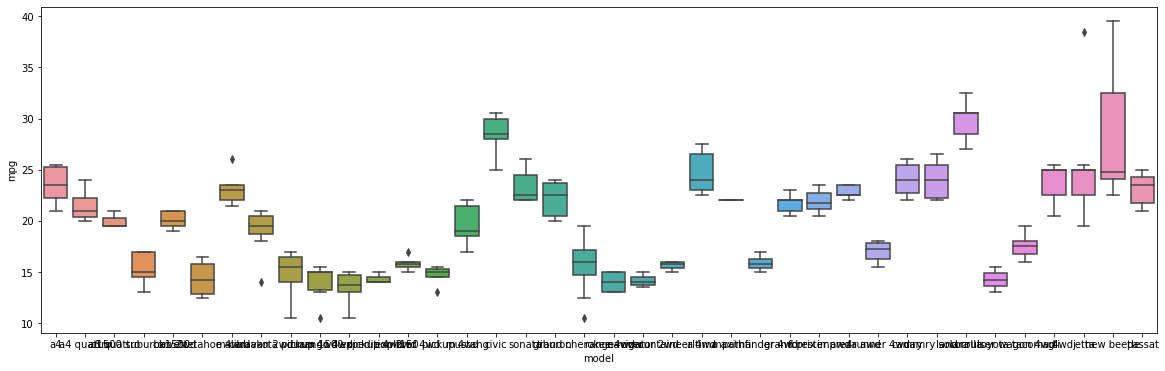

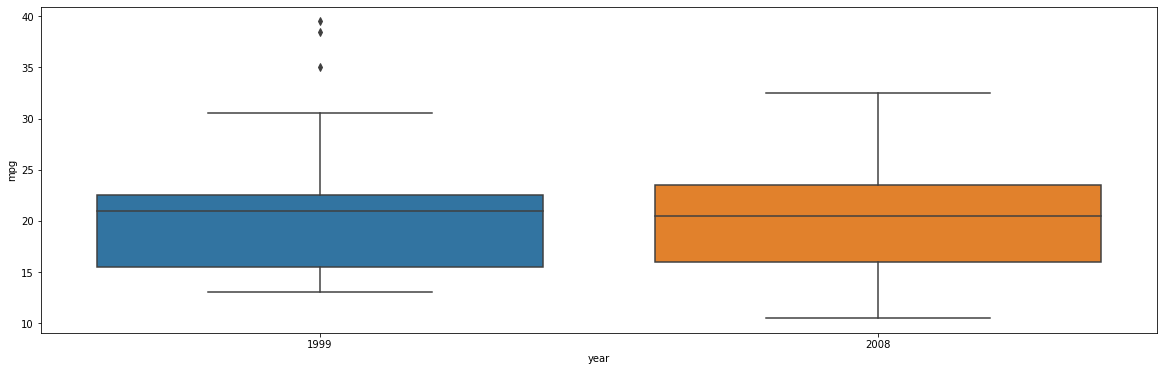

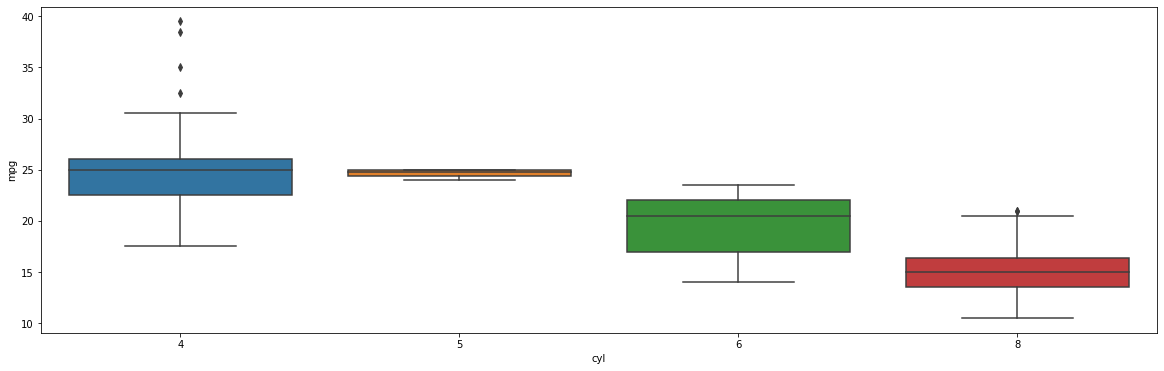

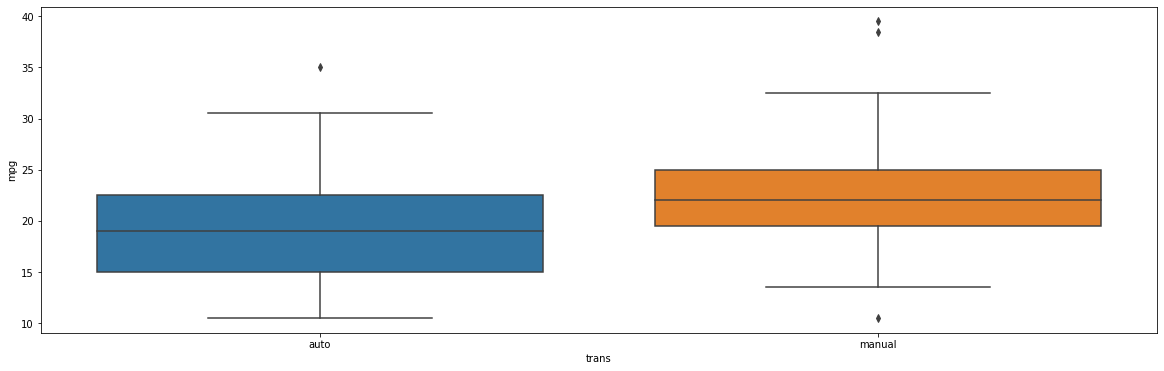

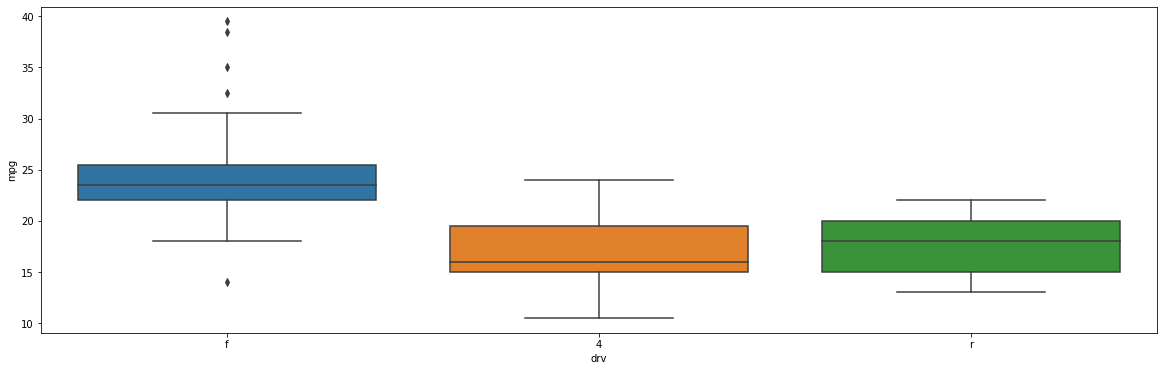

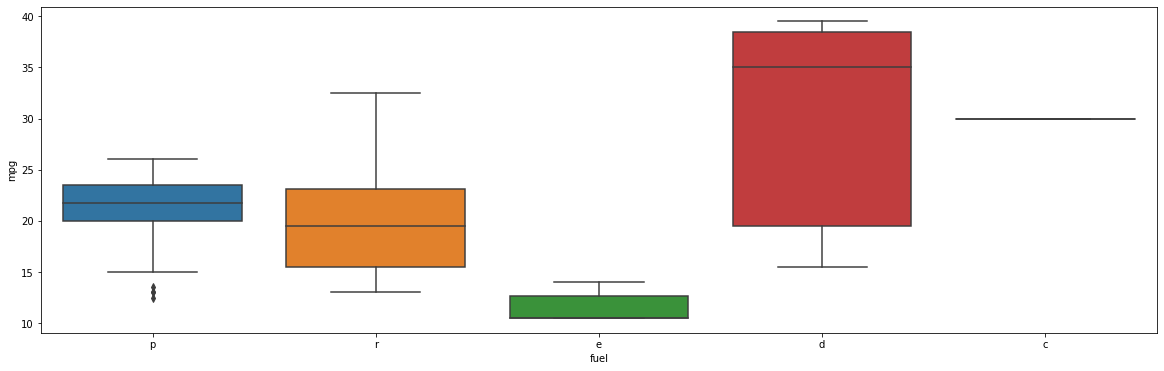

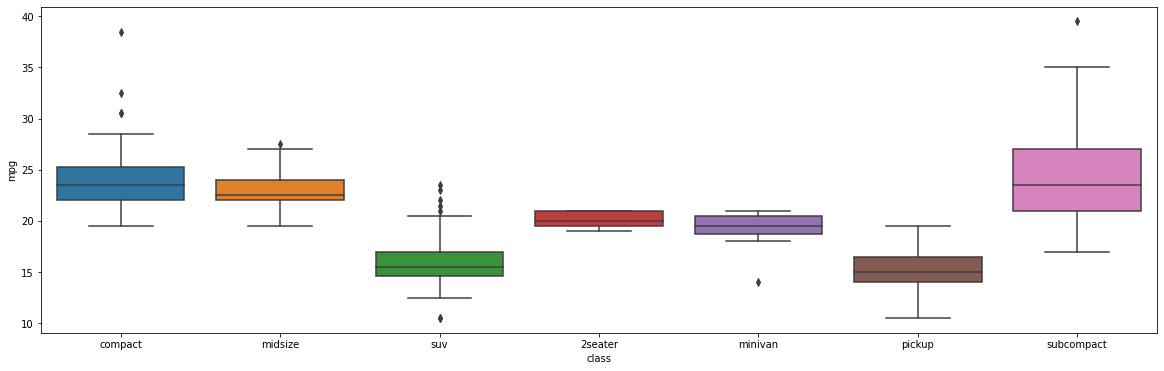

In [76]:
for col in df.select_dtypes(include='object'):
    plt.figure(figsize=(20,6))
    sns.boxplot(data=df, x=col, y='mpg')
    plt.show()

### Takeaways 
* displ has negative corrrelation with mpg --> investigate
*  --> drop hwy and cty
* drop model
*  year ? --> investigate mpg with test
* trans --> investigate
* fuel --> diesel highest mpg

In [ ]:
#investigations

In [104]:
# Displacment with mpg
print(f'H_0: There is no relationship between displacement and mpg\n\
H_a: There is a relationship between displacement and mpg \n\
alpha: .05')

alpha =.05
corr, p = stats.pearsonr(df.displ, df.mpg)

print(f'Pearson r: {corr}\np: {p}')

if p > alpha:
    print('There is not enough evidence to reject the null hypothesis')
else:
    print('There is enough evidence to reject the null hypothesis')

H_0: There is no relationship between displacement and mpg
H_a: There is a relationship between displacement and mpg 
alpha: .05
Pearson r: -0.7880587789213501
p: 8.676050625753831e-51
There is enough evidence to reject the null hypothesis


<AxesSubplot:>

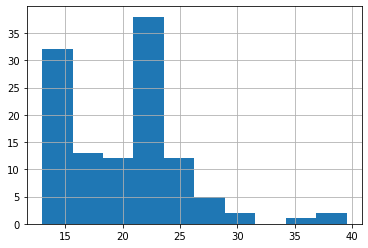

In [93]:
#year vs mpg
df[df.year == 1999].mpg.hist()

<AxesSubplot:>

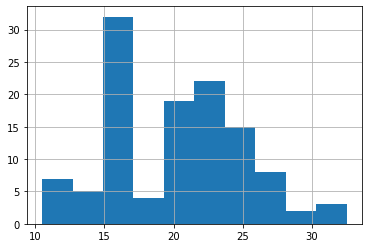

In [94]:
df[df.year != 1999].mpg.hist()

In [98]:
df[df.year == 1999].mpg.var(), df[df.year != 1999].mpg.var()
# has variance ratio less than 4 .. roughly equal


(27.122605363984682, 24.097480106100797)

In [105]:
# Year vs mpg --> using indepedant t-test assumptions verified
print(f'H_0: There is no difference in average mpg between transmission types\n\
H_a: There is a significant difference in average mpg between transmission types \n\
alpha: .05')

alpha =.05
t, p = stats.ttest_ind(df[df.year == 1999].mpg, df[df.year != 1999].mpg)

print(f't-statistic: {t}\np: {p}')

if p > alpha:
    print('There is not enough evidence to reject the null hypothesis')
else:
    print('There is enough evidence to reject the null hypothesis')

H_0: There is no difference in average mpg between transmission types
H_a: There is a significant difference in average mpg between transmission types 
alpha: .05
t-statistic: 0.21960177245940962
p: 0.8263744040323578
There is not enough evidence to reject the null hypothesis


In [108]:
# trans vs mpg --> using indepedant t-test assumptions verified
print(f'H_0: There is no difference in average mpg between transmission types\n\
H_a: There is a significant difference in average mpg between transmission types \n\
alpha: .05')

alpha =.05
t, p = stats.ttest_ind(df[df.trans == 'auto'].mpg, df[df.trans == 'manual'].mpg)

print(f't-statistic: {t}\np: {p}')

if (p/2 < alpha) | (t < 0):
    print('There is not enough evidence to reject the null hypothesis')
else:
    print('There is enough evidence to reject the null hypothesis')


H_0: There is no difference in average mpg between transmission types
H_a: There is a significant difference in average mpg between transmission types 
alpha: .05
t-statistic: -4.593437735750014
p: 7.154374401145685e-06
There is not enough evidence to reject the null hypothesis


### Takeaways
* Testing shows correlation between displacement and mpg
* testing supports difference in mpg between years
* testing does not support difference in mpg between transmission types

## Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.


In [110]:
# drop unwanted columns
df = df.drop(columns=['model', 'cty', 'hwy'])

In [112]:
# encode categoricals 
df = pd.get_dummies(df, drop_first=True)

In [113]:
#split data into sets
train_val, test = train_test_split(df, test_size = .2, random_state=514)
train, validate = train_test_split(train_val, test_size= .3, random_state=514)


In [114]:
# create X,y for train, validate and test subsets
X_train = train.drop(columns='mpg')
y_train = train.mpg
X_val = validate.drop(columns='mpg')
y_val = validate.mpg
X_test = test.drop(columns='mpg')
y_test = test.mpg

In [116]:
#for practice use feature engineer functions best features --> our pick would be year and engine displacement
def select_kbest(X, y, k): 
    # initilize selector object
    f_selector = SelectKBest(f_regression, k=k)

    #fit object --> will find top 2 as requested
    f_selector.fit(X, y)

    # create mask
    feature_mask = f_selector.get_support()

    # use mask to show list of feature support
    f_top_features = X.iloc[:,feature_mask].columns.tolist()

    return f_top_features
    
def rfe (X, y, n):

    #initialize  regression object
    lm = LinearRegression()

    # initilize RFE object with 2 features
    rfe = RFE(lm, n_features_to_select=n)

    #fit object onto data
    rfe.fit(X, y)

    #create boolean mask for columns model selects 
    feature_mask = rfe.support_

    # use mask to show list of selected features
    rfe_top_features = X.iloc[:, feature_mask].columns.tolist()

    return rfe_top_features

In [117]:
features  = ['year', 'displ']

f_features = select_kbest(X_train, y_train, 3)

rfe_features = rfe(X_train, y_train, 3)

features, f_features, rfe_features

(['year', 'displ'],
 ['displ', 'cyl_8', 'drv_f'],
 ['fuel_d', 'class_pickup', 'class_suv'])

In [121]:
# make y_train and y_val dframes so we can add the baseline and model predictiosn to them
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)

## Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [124]:
#baseline --> choose between mean and median by comparing RMSE

#add baseline columns
y_train['mpg_pred_mean'] = y_train.mpg.mean()
y_train['mpg_pred_median'] = y_train.mpg.median()
y_val['mpg_pred_mean'] = y_val.mpg.mean()
y_val['mpg_pred_median'] = y_val.mpg.median()

#add/calc RMSEs for mean baseline predictions --> Print out for comparison
rmse_train = mean_squared_error(y_train.mpg, y_train.mpg_pred_mean, squared=False)
rmse_val = mean_squared_error(y_val.mpg, y_val.mpg_pred_mean, squared=False)

print(f'RMSEs: Mean\n Train/In Sample: {round(rmse_train, 2)}\n Validate/Out of Sample: {round(rmse_val, 2)}')

#add/calc RMSEs for median baseline predictions
rmse_train = mean_squared_error(y_train.mpg, y_train.mpg_pred_median, squared=False)
rmse_val = mean_squared_error(y_val.mpg, y_val.mpg_pred_median, squared=False)

print(f'RMSEs: Median\n Train/In Sample: {round(rmse_train, 2)}\n Validate/Out of Sample: {round(rmse_val, 2)}')




RMSEs: Mean
 Train/In Sample: 5.0
 Validate/Out of Sample: 5.29
RMSEs: Median
 Train/In Sample: 5.02
 Validate/Out of Sample: 5.34


In [125]:
# Using Mean --> lets drop the median category and change mpg_pred_mean to baseline_mean
for frame in [y_train, y_val]:
    frame.drop(columns='mpg_pred_median', inplace=True)

<AxesSubplot:ylabel='Count'>

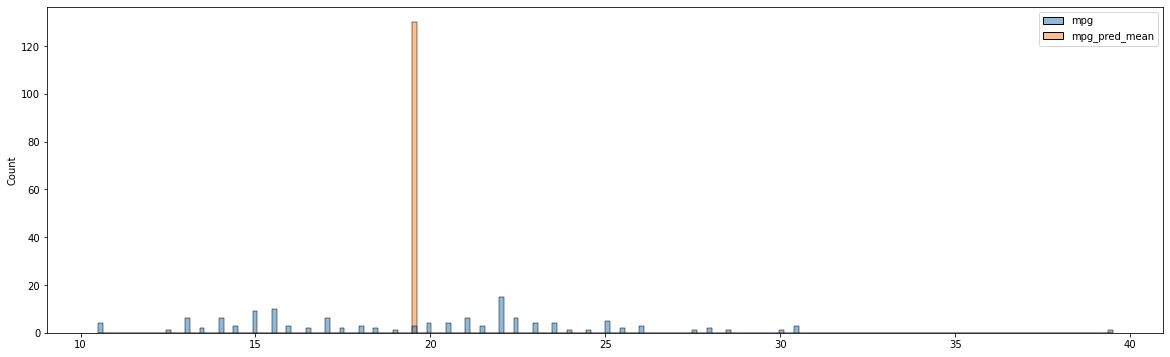

In [128]:
#plot them
plt.figure(figsize=(20,6))
sns.histplot(y_train)